# canopy cover

In [21]:
from scripts.als import *

filename = '../data_store/data/sodankyla_als/lasfiles/tiffs/list30.tiff'

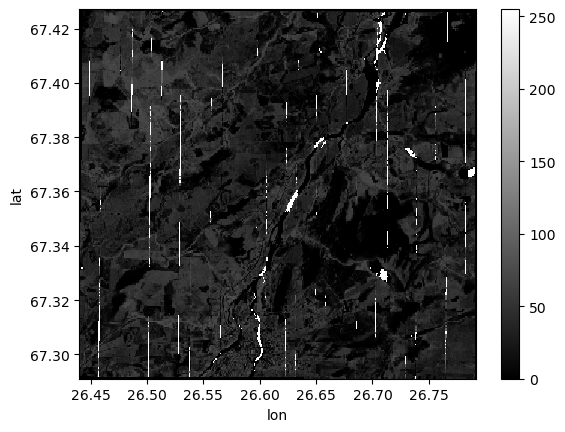

In [26]:
data = load_raster(filename)
data.plot(cmap='gray')
# data.sel(lon=slice(

In [27]:

def average_pixel_value(data_array, latitude, longitude, w):
    # Calculate the bounding box
    lat_min = latitude - w / 2
    lat_max = latitude + w / 2
    lon_min = longitude - w / (2 * np.cos(np.radians(latitude)))
    lon_max = longitude + w / (2 * np.cos(np.radians(latitude)))

    # data_array.plot(cmap='gray')
    
    # Select the data within the bounding box
    sub_data = data_array.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

    # Check if the sub_data is empty
    if sub_data.size == 0:
        print("Selected sub_data is empty.")
        return np.nan

    # Replace values outside the valid range (0-100) with NaN
    valid_data = sub_data.where((sub_data >= 0) & (sub_data <= 100))

    # Check if there are any valid data points
    if valid_data.count() == 0:
        print("No valid data points in the selected sub_data.")
        return np.nan

    # Calculate the average of the valid data
    average_value = valid_data.mean().item()

    return average_value

average_value = average_pixel_value(data, 26.45, 67.2895, 0.005)
average_value

Selected sub_data is empty.


nan